In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sb

In [2]:
# 데이터 불러오기
df = pd.read_csv("data/고객db_확장본3.csv")

In [3]:
# 차량 구매 서비스 플랫폼 -> 회원 정보, 구매 정보 포함
df

,연번,이름 (Name),생년월일 (Date of Birth),성별 (Gender),휴대폰번호 (Phone Number),이메일 (Email),주소 (Address),아이디 (User ID),가입일 (Registration Date),고객 세그먼트 (Customer Segment),차량구분(vehicle types),구매한 제품 (Purchased Product),제품 구매 날짜 (Purchase Date),거래 금액 (Transaction Amount),거래 방식 (Transaction Method),제품 구매 빈도 (Purchase Frequency),제품 구매 경로 (Purchase Path)
0,1,강주온,2002-03-04,남,010-6502-8753,janisi@himedia.co.kr,인천광역시 남동구 구월동 88-10,14798,2023-04-01,일반,준중형 세단,Avante (CN7 N),2024-04-04,"35,170,000",신용카드,1,오프라인
1,2,김경수,1983-01-02,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,광주광역시 서구 치평동 14-7,kyoungsoo031,2025-02-09,vip,준대형 세단,G80 (RG3),2025-02-10,"85,790,000",신용카드,5,오프라인
2,3,김다은,1999-05-02,여,010-6789-0123,kimdaeun26@himedia.co.kr,부산광역시 해운대구 우동 101-12,daeun026,2025-02-28,신규,중형 suv,NEXO (FE),2025-03-10,"69,500,000",계좌이체,1,오프라인
3,4,김민수,1960-07-01,남,010-1234-5678,kimminsu1@himedia.co.kr,전라남도 목포시 부주동 77-8,minsu001,2023-04-28,일반,중형 suv,Santa-Fe ™,2023-05-01,"34,920,000",현금,1,오프라인
4,5,김승현,1970-03-02,남,010-0123-4567,kimseunghyun20@himedia.co.kr,경기도 수원시 영통구 원천동 12-34,seunghyun020,2023-09-18,이탈가능,중형 세단,G70 (IK),2023-10-01,"50,230,000",신용카드,1,오프라인
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,288,신시우,1958-07-11,여,042-207-6955,gyeonghyi78@gmail.com,전라북도 전주시 완산구 덕진동 33-7,jihungim,2023-03-06,신규,준중형 세단,G80 (RG3),2024-12-20,"86,770,000",신용카드,2,온라인
288,289,최춘자,1976-06-27,여,031-170-7739,hancunja@yu.kr,충청남도 천안시 동남구 성성동 22-3,jinho50,2024-08-26,신규,준대형 세단,Avante (CN7 N),2023-08-24,"69,510,000",현금,3,오프라인
289,290,차서준,1968-01-22,여,064-741-3740,qgim@simryujo.com,경상남도 창원시 의창구 봉곡동 48-6,jihun41,2023-01-02,vip,준대형 세단,NEXO (FE),2024-01-12,"39,890,000",계좌이체,2,온라인
290,291,안정희,1984-01-10,남,051-406-1803,donghyeonbae@joyunson.com,대구광역시 수성구 범어동 55-3,yeongil47,2023-04-08,신규,소형 해치백,G80 (RG3),2024-01-30,"44,530,000",현금,2,온라인


In [4]:
df = df.rename(columns={
    "이름 (Name)": "이름",
    "생년월일 (Date of Birth)": "생년월일",
    "성별 (Gender)": "성별",
    "이메일 (Email)": "이메일",
    "휴대폰번호 (Phone Number)": "휴대폰 번호",
    "주소 (Address)": "주소",
    "아이디 (User ID)": "아이디",
    "가입일 (Registration Date)": "가입일",
    "고객 세그먼트 (Customer Segment)": "고객 등급",
    "차량구분(vehicle types)": "차량 유형",
    "구매한 제품 (Purchased Product)": "최근 구매 제품",
    "제품 구매 날짜 (Purchase Date)": "최근 구매 날짜",
    "거래 금액 (Transaction Amount)": "최근 거래 금액",
    "거래 방식 (Transaction Method)": "선호 거래 방식",
    "제품 구매 빈도 (Purchase Frequency)": "차량 구매 횟수",
    "제품 구매 경로 (Purchase Path)": "선호 구매 경로"
})

In [5]:
# 구매 금액 숫자로 변환
df["최근 거래 금액"] = df["최근 거래 금액"].str.replace(",", "").astype(int)

In [6]:
# 구매 당시 나이 계산
df["최근 구매 당시 나이"] = df["최근 구매 날짜"].str.split("-").str.get(0).astype(int) - df["생년월일"].str.split("-").str.get(0).astype(int)

In [7]:
# 현재 나이 계산
df["현재 나이"] = 2025 - df["생년월일"].str.split("-").str.get(0).astype(int)

In [8]:
# 20대, 30대 등으로 연령대 나눈 컬럼
df["연령대"] = (df["현재 나이"] // 10 * 10).astype(str) + "대"

In [9]:
# 거주 지역 : 시 단위로 추출
df["거주 지역"] = df["주소"].str.split("시").str.get(0) + "시"

In [10]:
# 구매 날짜가 현재 이후인 데이터 삭제
df = df[df["최근 구매 날짜"] < "2025-03-20"]

In [11]:
# 마지막 구매 이후 경과 기간 컬럼 생성
df["마지막 구매 이후 경과 기간"] = (pd.to_datetime("2025-03-20") - pd.to_datetime(df["최근 구매 날짜"])).dt.days

In [12]:
# 구매 시점 컬럼 추가
def get_season(date):
    month = int(date.split("-")[1])
    if month in [1, 2, 3]:
        return "1분기"
    elif month in [4, 5, 6]:
        return "2분기"
    elif month in [7, 8, 9]:
        return "3분기"
    else:
        return "4분기"

df["최근 구매 시점"] = df["최근 구매 날짜"].apply(get_season)

print(df[["최근 구매 날짜", "최근 구매 시점"]].head())

     최근 구매 날짜 최근 구매 시점
0  2024-04-04      2분기
1  2025-02-10      1분기
2  2025-03-10      1분기
3  2023-05-01      2분기
4  2023-10-01      4분기


In [13]:
# 차량 유형 컬럼 명확하게 정리
vehicle_mapping = {
    "Avante (CN7 N)": "준중형 세단",
    "Avante (CN7 HEV)": "준중형 세단",
    "Grandeur (GN7 HEV)": "준대형 세단",
    "G80 (RG3)": "대형 세단",
    "Santa-Fe ™": "중형 SUV",
    "Santa-Fe (MX5 PHEV)": "중형 SUV",
    "Tucson (NX4 PHEV)": "준중형 SUV",
    "Palisade (LX2)": "준대형 SUV",
    "IONIQ (AE EV)": "준중형 해치백",
    "IONIQ 6 (CE)": "중형 세단",
    "NEXO (FE)": "중형 SUV",
    "G90 (HI)": "대형 세단",
    "G70 (IK)": "중형 세단",
    "i30 (PD)": "준중형 해치백",
    "GV80 (RS4)": "대형 SUV",
    "G90 (RS4)": "프리미엄 세단"
}

df["차량 유형"] = df["최근 구매 제품"].map(vehicle_mapping)

In [14]:
# 연료 구분 컬럼 추가
car_fuel_mapping = {
    "Avante (CN7 N)": "휘발유",
    "Avante (CN7 HEV)": "하이브리드",
    "Grandeur (GN7 HEV)": "하이브리드",
    "G80 (RG3)": "휘발유",
    "Santa-Fe ™": "디젤",
    "Santa-Fe (MX5 PHEV)": "플러그인 하이브리드",
    "Tucson (NX4 PHEV)": "플러그인 하이브리드",
    "Palisade (LX2)": "디젤",
    "IONIQ (AE EV)": "전기",
    "IONIQ 6 (CE)": "전기",
    "NEXO (FE)": "수소",
    "G90 (HI)": "휘발유",
    "G70 (IK)": "휘발유",
    "i30 (PD)": "휘발유",
    "GV80 (RS4)": "디젤",
    "G90 (RS4)": "휘발유"
}

df["연료 구분"] = df["최근 구매 제품"].map(car_fuel_mapping)

In [15]:
# 회원 세그먼트 컬럼 내용 변경
# VIP : 2회 이상 구매한 회원
# 일반 : 최근 6개월 이전 차량 구매한 회원
# 신규 : 최근 6개월 이내 차량 구매한 회원

def get_segment(date, count):
    if count >= 2:
        return "VIP"
    elif date >= "2024-09-20":
        return "신규"
    else:
        return "일반"

df["고객 등급"] = df.apply(
    lambda row: get_segment(row["최근 구매 날짜"], row["차량 구매 횟수"]),
    axis=1
    )

In [16]:
# 고객 구분 컬럼 추가
# 이메일 도메인이 himedia.co.kr인 경우 법인, 그 외는 개인
def get_client_type(email):
    domain = email.split("@")[1]
    if domain == "himedia.co.kr":
        return "법인"
    else:
        return "개인"

df["고객 구분"] = df["이메일"].apply(get_client_type)

print(df[["이메일", "고객 구분"]].head())

                            이메일 고객 구분
0          janisi@himedia.co.kr    법인
1  kimkyoungsoo31@himedia.co.kr    법인
2      kimdaeun26@himedia.co.kr    법인
3       kimminsu1@himedia.co.kr    법인
4  kimseunghyun20@himedia.co.kr    법인


In [17]:
# 가입 이후 경과 기간 컬럼 추가
df["가입 이후 경과 기간"] = (pd.to_datetime("2025-03-20") - pd.to_datetime(df["가입일"])).dt.days

In [18]:
# 인구 밀도 컬럼 추가
# e-나라지표 참고 (https://www.index.go.kr/unity/potal/main/EachDtlPageDetail.do?idx_cd=1007)
pop_density = {
    '인천광역시':2820, '광주광역시':2921, '부산광역시':4258, '전라남도 목포시':4093, '경기도 수원시':9879, '울산광역시':1041, '서울특별시':15533,
       '경상남도 창원시':1338, '전라북도 전주시':3099, '충청북도 청주시':907, '경기도 성남시':6467, '경상북도 포항시':436,
       '충청남도 천안시':1036, '대구광역시':2666, '대전광역시':2731
}

df["인구 밀도"] = df["거주 지역"].map(pop_density)

In [19]:
# 차량 유형 컬럼 두 개로 분리
df["차량 사이즈"] = df["차량 유형"].str.split(" ").str.get(0)
df["차량 유형"] = df["차량 유형"].str.split(" ").str.get(1)

In [20]:
# 서비스 가입 이후 구매 이력이 존재하는지 파악하는 컬럼 추가
# 최초 구매자에게 혜택 제공하는 근거로 사용 가능
def is_first(reg_date, pur_date):
    date_diff = (pd.to_datetime(pur_date) - pd.to_datetime(reg_date)).days
    if date_diff < 0 :
        return "X"
    else:
        return "O"
    
df["회원가입 이후 구매 이력"] = df.apply(lambda row: is_first(row["가입일"], row["최근 구매 날짜"]), axis=1)

In [21]:
# 신차 구매 지수 (구매 횟수 * 구매 금액 / 가입 이후 경과 기간) 컬럼 추가
# 지수가 가장 높은 사람의 데이터 기준, 0~1 사이 값으로 정규화
# 가입 이후 경과 기간이 짧음에도 차량 구매 및 최근 거래 금액이 클 경우 신차 구매 지수가 높다고 볼 수 있음
df["신차 구매 지수"] = ((df["차량 구매 횟수"] * df["최근 거래 금액"] / df["가입 이후 경과 기간"])
 / ((df["차량 구매 횟수"] * df["최근 거래 금액"] / df["가입 이후 경과 기간"]).max())).round(3)

In [22]:
# 브랜드 충성도 지수 (차량 구매 횟수 * 가입 이후 경과 기간) 컬럼 추가
# 지수가 가장 높은 사람의 데이터 기준, 0~1 사이 값으로 정규화
# 가입 이후 경과 기간이 길고 차량 구매 횟수가 많을수록 충성도 지수가 높다고 볼 수 있음
df["브랜드 충성도 지수"] = ((df["차량 구매 횟수"] * df["가입 이후 경과 기간"])
 / ((df["차량 구매 횟수"] * df["가입 이후 경과 기간"]).max())).round(3)

In [23]:
df["신차 구매 지수"].median(), df["신차 구매 지수"].mean(), df["브랜드 충성도 지수"].median(), df["브랜드 충성도 지수"].mean()

(0.012, 0.03768728522336769, 0.213, 0.2891134020618557)

In [24]:
#  "최근 구매 요일" 컬럼 추가 (구매 날짜 기반)
def get_day(date):
    day = date.dayofweek
    if day in [0, 1, 2, 3, 4]:
        return "평일"
    else:
        return "주말"

df["최근 구매 요일"] = pd.to_datetime(df["최근 구매 날짜"]).apply(get_day)

In [25]:
# 컬럼별 데이터 타입 확인 -> object는 문자열, int64는 정수
# 거래 금액은 문자열에서 정수로 바꾸어줄 필요
df.dtypes

연번                   int64
이름                  object
생년월일                object
성별                  object
휴대폰 번호              object
이메일                 object
주소                  object
아이디                 object
가입일                 object
고객 등급               object
차량 유형               object
최근 구매 제품            object
최근 구매 날짜            object
최근 거래 금액             int64
선호 거래 방식            object
차량 구매 횟수             int64
선호 구매 경로            object
최근 구매 당시 나이          int64
현재 나이                int64
연령대                 object
거주 지역               object
마지막 구매 이후 경과 기간      int64
최근 구매 시점            object
연료 구분               object
고객 구분               object
가입 이후 경과 기간          int64
인구 밀도                int64
차량 사이즈              object
회원가입 이후 구매 이력       object
신차 구매 지수           float64
브랜드 충성도 지수         float64
최근 구매 요일            object
dtype: object

In [26]:
df.columns

Index(['연번', '이름', '생년월일', '성별', '휴대폰 번호', '이메일', '주소', '아이디', '가입일', '고객 등급',
       '차량 유형', '최근 구매 제품', '최근 구매 날짜', '최근 거래 금액', '선호 거래 방식', '차량 구매 횟수',
       '선호 구매 경로', '최근 구매 당시 나이', '현재 나이', '연령대', '거주 지역', '마지막 구매 이후 경과 기간',
       '최근 구매 시점', '연료 구분', '고객 구분', '가입 이후 경과 기간', '인구 밀도', '차량 사이즈',
       '회원가입 이후 구매 이력', '신차 구매 지수', '브랜드 충성도 지수', '최근 구매 요일'],
      dtype='object')

In [27]:
df = df.loc[:, ['연번', '이름', '생년월일', '현재 나이', '연령대', '성별', '휴대폰 번호', '이메일', '고객 구분', '주소', '거주 지역', '인구 밀도', '아이디',
                '가입일', '가입 이후 경과 기간', '고객 등급', '회원가입 이후 구매 이력', '최근 구매 제품', '차량 사이즈', '차량 유형', '연료 구분',
                '최근 구매 날짜', '최근 구매 시점', '최근 구매 요일', '마지막 구매 이후 경과 기간', '최근 구매 당시 나이', '최근 거래 금액', '선호 거래 방식',
                '선호 구매 경로', '차량 구매 횟수', '신차 구매 지수', '브랜드 충성도 지수']]

In [28]:
df

,연번,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,주소,...,최근 구매 시점,최근 구매 요일,마지막 구매 이후 경과 기간,최근 구매 당시 나이,최근 거래 금액,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,브랜드 충성도 지수
0,1,강주온,2002-03-04,23,20대,남,010-6502-8753,janisi@himedia.co.kr,법인,인천광역시 남동구 구월동 88-10,...,2분기,평일,350,22,35170000,신용카드,오프라인,1,0.002,0.135
1,2,김경수,1983-01-02,42,40대,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,광주광역시 서구 치평동 14-7,...,1분기,평일,38,42,85790000,신용카드,오프라인,5,0.508,0.037
2,3,김다은,1999-05-02,26,20대,여,010-6789-0123,kimdaeun26@himedia.co.kr,법인,부산광역시 해운대구 우동 101-12,...,1분기,평일,10,26,69500000,계좌이체,오프라인,1,0.161,0.004
3,4,김민수,1960-07-01,65,60대,남,010-1234-5678,kimminsu1@himedia.co.kr,법인,전라남도 목포시 부주동 77-8,...,2분기,평일,689,63,34920000,현금,오프라인,1,0.002,0.130
4,5,김승현,1970-03-02,55,50대,남,010-0123-4567,kimseunghyun20@himedia.co.kr,법인,경기도 수원시 영통구 원천동 12-34,...,4분기,주말,536,53,50230000,신용카드,오프라인,1,0.004,0.103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,288,신시우,1958-07-11,67,60대,여,042-207-6955,gyeonghyi78@gmail.com,개인,전라북도 전주시 완산구 덕진동 33-7,...,4분기,평일,90,66,86770000,신용카드,온라인,2,0.011,0.280
288,289,최춘자,1976-06-27,49,40대,여,031-170-7739,hancunja@yu.kr,개인,충청남도 천안시 동남구 성성동 22-3,...,3분기,평일,574,47,69510000,현금,오프라인,3,0.047,0.116
289,290,차서준,1968-01-22,57,50대,여,064-741-3740,qgim@simryujo.com,개인,경상남도 창원시 의창구 봉곡동 48-6,...,1분기,평일,433,56,39890000,계좌이체,온라인,2,0.005,0.304
290,291,안정희,1984-01-10,41,40대,남,051-406-1803,donghyeonbae@joyunson.com,개인,대구광역시 수성구 범어동 55-3,...,1분기,평일,415,40,44530000,현금,온라인,2,0.006,0.268


In [29]:
df.to_csv("data/고객db_전처리.csv", index=False)

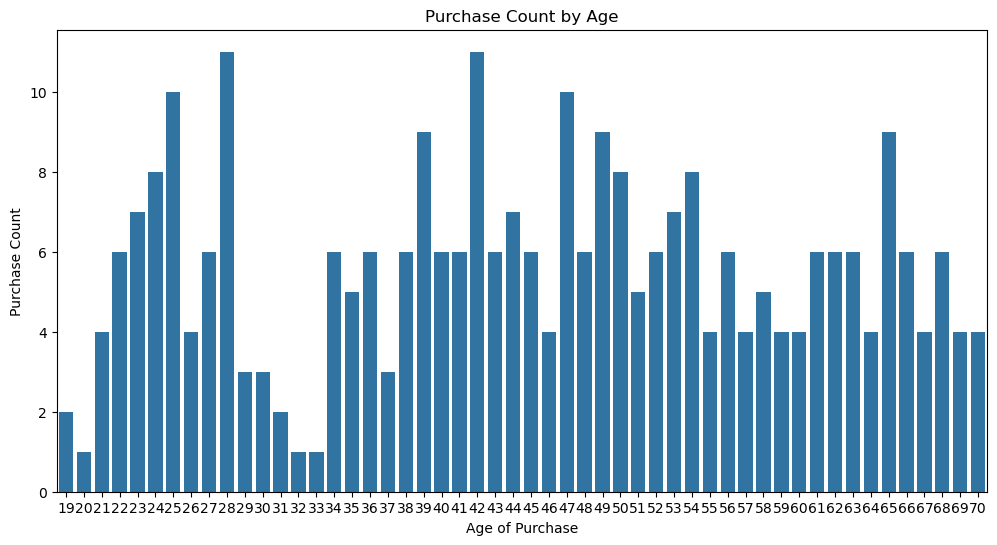

In [22]:
# 구매 당시 나이별 구매 횟수를 시각화하기
# 바 플롯으로
# 20대 초반에 구매 횟수가 가장 많음
plt.figure(figsize=(12, 6))
sb.countplot(data=df, x="구매 당시 나이")
plt.xlabel("Age of Purchase")
plt.ylabel("Purchase Count")
plt.title("Purchase Count by Age")
plt.show()

In [ ]:
# 잠재적인 고객층

# 20대 중후반에 구매 횟수가 가장 많음
# 40대 중반에도 구매 횟수가 증가하는 경향성
# 60대 중반에 구매 횟수 소폭 상승

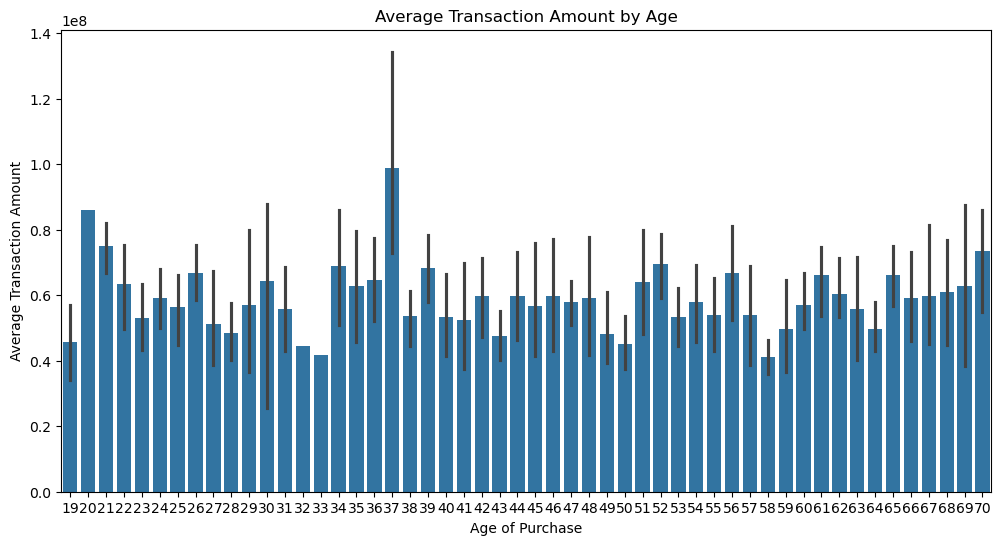

In [25]:
# 구매 당시 나이별 구매 금액을 시각화하기
# 바 플롯으로, 평균 구매 금액
plt.figure(figsize=(12, 6))
sb.barplot(data=df, x="구매 당시 나이", y="거래 금액")
plt.xlabel("Age of Purchase")
plt.ylabel("Average Transaction Amount")
plt.title("Average Transaction Amount by Age")
plt.show()

In [ ]:
# 30대 중반에 구매 금액이 가장 높음